In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

digits = load_digits()
print("Image size: ",digits.data.shape[1])

Image size:  64


### Image Noise Filtering using PCA

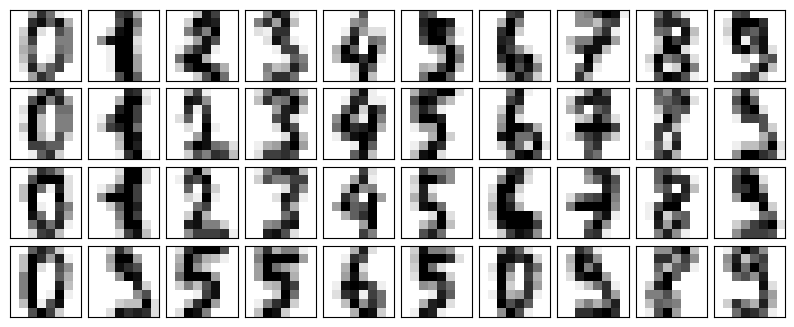

In [2]:
import matplotlib.pyplot as plt

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data) 

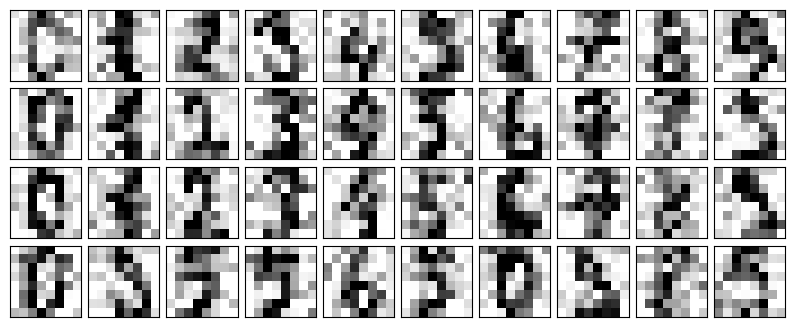

In [3]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy) # Image with noise

In [4]:
pca = PCA(0.50).fit(noisy) 
print(pca.n_components_) # Basis Vector

12


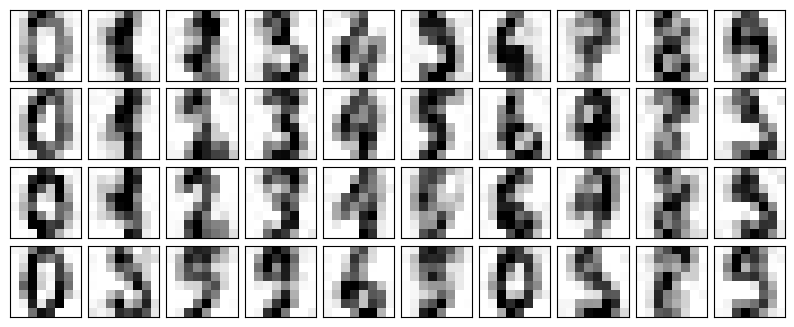

In [5]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Image Compression using PCA

In [6]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
print("Image size: ",digits.data.shape[1])

Image size:  64


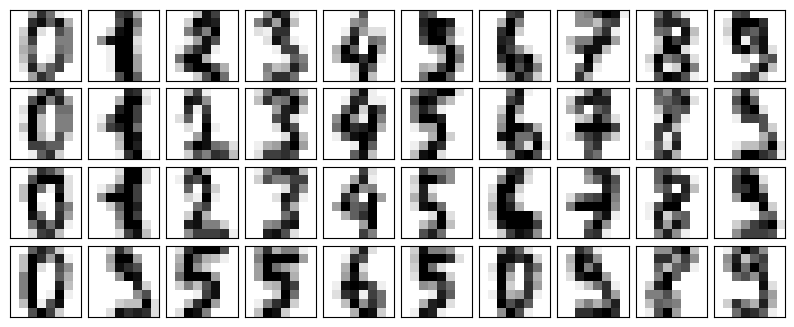

In [7]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [8]:
pca = PCA(0.90).fit(digits.data) 
print(pca.n_components_) # Basis vector

21


In [9]:
compression_ratio= (digits.data.shape[1]-pca.n_components_)/digits.data.shape[1]*100
print(compression_ratio," %") # Compress Ratio

67.1875  %


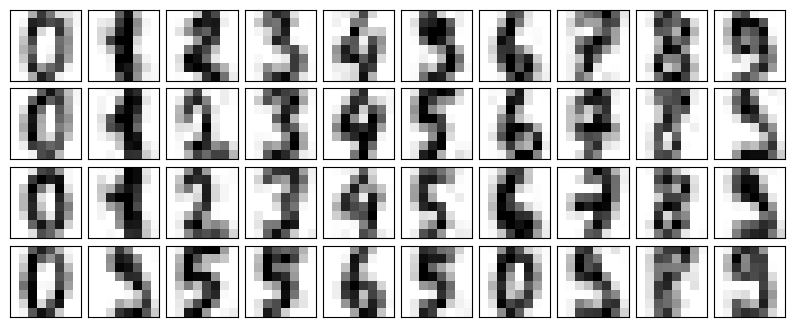

In [10]:
components = pca.transform(digits.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)